In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


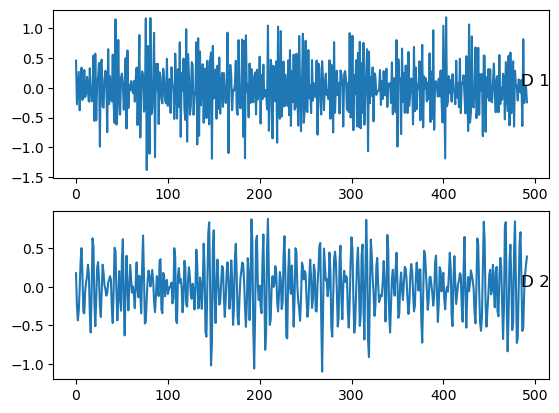

In [22]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('wavelet_coefficients_coif4.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [1,2]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [23]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg



In [69]:
# load dataset
dataset = read_csv('wavelet_coefficients_coif4.csv', header=0)
dataset=dataset.drop(['D 4'], axis=1)


In [70]:
dataset

,Original Signal,Approximation,D 1,D 2,D 3
0,0.73,0.209424,0.457295,0.175450,0.332665
1,0.38,0.240866,-0.275991,-0.249437,-0.083109
2,0.92,0.272416,-0.006988,-0.437113,-0.383322
3,0.91,0.304010,0.268383,-0.309367,-0.486706
4,0.66,0.335432,-0.376069,-0.027140,-0.380195
...,...,...,...,...,...
487,1.00,0.067901,0.817557,-0.533592,-0.343623
488,1.71,0.091965,-0.254800,-0.074122,0.020448
489,0.98,0.118820,-0.090061,0.160595,0.435306
490,0.30,0.147874,0.032378,0.284683,0.676631


In [71]:
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed)
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[2,3,6]], axis=1, inplace=True)
# print(reframed.head())

     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var1(t)   var2(t)  \
1       0.4300   0.339431   0.716219   0.644660   0.835031   0.3425  0.369384   
2       0.3425   0.369384   0.430286   0.430414   0.415479   0.4775  0.399439   
3       0.4775   0.399439   0.535179   0.335780   0.132383   0.4750  0.429537   
4       0.4750   0.429537   0.642556   0.400194   0.089613   0.4125  0.459470   
5       0.4125   0.459470   0.391262   0.542506   0.134420   0.4725  0.488545   
..         ...        ...        ...        ...        ...      ...       ...   
487     0.4675   0.184611   0.288415   0.266637   0.085540   0.4975  0.204613   
488     0.4975   0.204613   0.856697   0.287131   0.154786   0.6750  0.227537   
489     0.6750   0.227537   0.438549   0.518815   0.517312   0.4925  0.253120   
490     0.4925   0.253120   0.502786   0.637170   0.883910   0.3225  0.280797   
491     0.3225   0.280797   0.550529   0.699740   0.969450   0.4225  0.309769   

      var3(t)   var4(t)   v

In [72]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.4300,0.339431,0.716219,0.644660,0.835031,0.3425,0.369384,0.430286,0.430414,0.415479
2,0.3425,0.369384,0.430286,0.430414,0.415479,0.4775,0.399439,0.535179,0.335780,0.132383
3,0.4775,0.399439,0.535179,0.335780,0.132383,0.4750,0.429537,0.642556,0.400194,0.089613
4,0.4750,0.429537,0.642556,0.400194,0.089613,0.4125,0.459470,0.391262,0.542506,0.134420
5,0.4125,0.459470,0.391262,0.542506,0.134420,0.4725,0.488545,0.551348,0.721121,0.368635
...,...,...,...,...,...,...,...,...,...,...
487,0.4675,0.184611,0.288415,0.266637,0.085540,0.4975,0.204613,0.856697,0.287131,0.154786
488,0.4975,0.204613,0.856697,0.287131,0.154786,0.6750,0.227537,0.438549,0.518815,0.517312
489,0.6750,0.227537,0.438549,0.518815,0.517312,0.4925,0.253120,0.502786,0.637170,0.883910
490,0.4925,0.253120,0.502786,0.637170,0.883910,0.3225,0.280797,0.550529,0.699740,0.969450


In [73]:

# split into train and test sets
values = reframed.values
n_train_hours = 392
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(392, 1, 9) (392,) (99, 1, 9) (99,)


In [74]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=500, batch_size=64, validation_data=(test_X, test_y), verbose=1, shuffle=False)


Epoch 1/500
7/7 [==============================] - 2s 65ms/step - loss: 0.4377 - val_loss: 0.3933
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 0.3643 - val_loss: 0.3224
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3039 - val_loss: 0.2689
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2617 - val_loss: 0.2388
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2347 - val_loss: 0.2235
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 0.2219 - val_loss: 0.2188
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 0.2172 - val_loss: 0.2159
Epoch 8/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2141 - val_loss: 0.2122
Epoch 9/500
7/7 [==============================] - 0s 5ms/step - loss: 0.2100 - val_loss: 0.2076
Epoch 10/500
7/7 [==============================] - 0s 6ms/step - loss: 0.2055 - val_loss: 0.2032
Epoch 11/500
7/7 [==========

7/7 [==============================] - 0s 7ms/step - loss: 0.1220 - val_loss: 0.1254
Epoch 85/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1215 - val_loss: 0.1247
Epoch 86/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1219 - val_loss: 0.1254
Epoch 87/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1215 - val_loss: 0.1246
Epoch 88/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1219 - val_loss: 0.1256
Epoch 89/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1215 - val_loss: 0.1246
Epoch 90/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1218 - val_loss: 0.1255
Epoch 91/500
7/7 [==============================] - 0s 8ms/step - loss: 0.1215 - val_loss: 0.1246
Epoch 92/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1218 - val_loss: 0.1255
Epoch 93/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1215 - val_loss: 0.1246
Epoch 94/500
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 0.1207 - val_loss: 0.1233
Epoch 168/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1211 - val_loss: 0.1243
Epoch 169/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1207 - val_loss: 0.1232
Epoch 170/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1211 - val_loss: 0.1245
Epoch 171/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1208 - val_loss: 0.1231
Epoch 172/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1210 - val_loss: 0.1245
Epoch 173/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1208 - val_loss: 0.1231
Epoch 174/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1210 - val_loss: 0.1246
Epoch 175/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1207 - val_loss: 0.1231
Epoch 176/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1209 - val_loss: 0.1245
Epoch 177/500
7/7 [=====

Epoch 250/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1212 - val_loss: 0.1242
Epoch 251/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1204 - val_loss: 0.1232
Epoch 252/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1210 - val_loss: 0.1243
Epoch 253/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1203 - val_loss: 0.1231
Epoch 254/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1207 - val_loss: 0.1242
Epoch 255/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1203 - val_loss: 0.1235
Epoch 256/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1208 - val_loss: 0.1243
Epoch 257/500
7/7 [==============================] - 0s 8ms/step - loss: 0.1202 - val_loss: 0.1230
Epoch 258/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1206 - val_loss: 0.1240
Epoch 259/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1202 - val_loss: 0.1234
Epoch 260/

7/7 [==============================] - 0s 6ms/step - loss: 0.1205 - val_loss: 0.1240
Epoch 333/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1199 - val_loss: 0.1235
Epoch 334/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1206 - val_loss: 0.1240
Epoch 335/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1199 - val_loss: 0.1235
Epoch 336/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1204 - val_loss: 0.1234
Epoch 337/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1200 - val_loss: 0.1232
Epoch 338/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1207 - val_loss: 0.1238
Epoch 339/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1200 - val_loss: 0.1232
Epoch 340/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1207 - val_loss: 0.1241
Epoch 341/500
7/7 [==============================] - 0s 8ms/step - loss: 0.1200 - val_loss: 0.1231
Epoch 342/500
7/7 [=====

Epoch 415/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1197 - val_loss: 0.1235
Epoch 416/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1196 - val_loss: 0.1235
Epoch 417/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1197 - val_loss: 0.1236
Epoch 418/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1197 - val_loss: 0.1234
Epoch 419/500
7/7 [==============================] - 0s 5ms/step - loss: 0.1197 - val_loss: 0.1237
Epoch 420/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1197 - val_loss: 0.1238
Epoch 421/500
7/7 [==============================] - 0s 8ms/step - loss: 0.1197 - val_loss: 0.1234
Epoch 422/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1197 - val_loss: 0.1236
Epoch 423/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1196 - val_loss: 0.1236
Epoch 424/500
7/7 [==============================] - 0s 6ms/step - loss: 0.1196 - val_loss: 0.1242
Epoch 425/

7/7 [==============================] - 0s 7ms/step - loss: 0.1197 - val_loss: 0.1247
Epoch 498/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1193 - val_loss: 0.1241
Epoch 499/500
7/7 [==============================] - 0s 7ms/step - loss: 0.1198 - val_loss: 0.1236
Epoch 500/500
7/7 [==============================] - 0s 8ms/step - loss: 0.1201 - val_loss: 0.1238


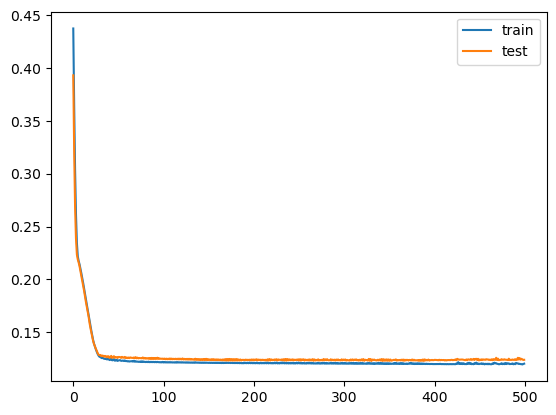

In [75]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [76]:
final_predictions = model.predict(test_X)
print(final_predictions.shape)

4/4 [==============================] - 0s 2ms/step
(99, 1)


In [77]:
train_predictions = model.predict(train_X)
print(train_predictions.shape)

13/13 [==============================] - 0s 2ms/step
(392, 1)


In [78]:
import pandas as pd
pd.DataFrame(train_y).to_csv('actualTrainLSTM .csv', index=False, header=False)
pd.DataFrame(train_predictions).to_csv('predictTrainLSTM .csv', index=False, header=False)
pd.DataFrame(test_y).to_csv('actualTestLSTM.csv', index=False, header=False)
pd.DataFrame(final_predictions).to_csv('predictTestLSTM.csv', index=False, header=False)

In [79]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_evaluation_metrics(y_observed, y_predicted):
     # Convert to NumPy arrays if they are lists
    if isinstance(y_observed, list):
        y_observed = np.array(y_observed)
    if isinstance(y_predicted, list):
        y_predicted = np.array(y_predicted)
        
    metrics = {}

    # Calculate ME (Mean Error)
    metrics['ME'] = np.mean(y_observed - y_predicted)

    # Calculate MAE (Mean Absolute Error)
    metrics['MAE'] = mean_absolute_error(y_observed, y_predicted)

    # Calculate MSE (Mean Squared Error)
    metrics['MSE'] = mean_squared_error(y_observed, y_predicted)

    # Calculate RMSE (Root Mean Squared Error)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Calculate NRMSE (Normalized Root Mean Squared Error)
    metrics['NRMSE'] = metrics['RMSE'] / (np.max(y_observed) - np.min(y_observed))

    # Calculate PBIAS (Percent Bias)
    metrics['PBIAS'] = np.mean(100 * (y_observed - y_predicted) / np.mean(y_observed))

    # Calculate RSR (Root Mean Square Ratio)
    metrics['RSR'] = metrics['RMSE'] / np.std(y_observed)

    # Calculate rSD (Ratio of the Standard Deviation)
    metrics['rSD'] = np.std(y_observed - y_predicted) / np.std(y_observed)

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    metrics['NSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate mNSE (Modified Nash-Sutcliffe Efficiency)
    metrics['mNSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate rNSE (Relative Nash-Sutcliffe Efficiency)
    metrics['rNSE'] = metrics['NSE'] / np.var(y_observed)

    # Calculate d (Index of Agreement)
    metrics['d'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                       np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate md (Modified d Index)
    metrics['md'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate rd (Relative d Index)
    metrics['rd'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate cp (Coefficient of Performance)
    metrics['cp'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                         np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate r (Index of Agreement)
    metrics['r'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                        np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate R2 (Coefficient of Determination)
    metrics['R2'] = r2_score(y_observed, y_predicted)

    return metrics


In [80]:
evaluation_metrics = calculate_evaluation_metrics(test_y, final_predictions)
print(evaluation_metrics)

{'ME': 0.007289897, 'MAE': 0.12375368, 'MSE': 0.025918212, 'RMSE': 0.16099134, 'NRMSE': 0.16782747, 'PBIAS': 1.4345752, 'RSR': 0.55651385, 'rSD': 1.3248718, 'NSE': -172.83612060546875, 'mNSE': -172.83612060546875, 'rNSE': -2065.2916163090017, 'd': 0.42763394117355347, 'md': 0.42763394117355347, 'rd': 0.42763394117355347, 'cp': 0.42763394117355347, 'r': 0.42763394117355347, 'R2': 0.6902923990570096}


In [81]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Design network
model = Sequential()
model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit network
history = model.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/500
6/6 - 2s - loss: 0.4679 - val_loss: 0.3820 - 2s/epoch - 336ms/step
Epoch 2/500
6/6 - 0s - loss: 0.3442 - val_loss: 0.2796 - 50ms/epoch - 8ms/step
Epoch 3/500
6/6 - 0s - loss: 0.2660 - val_loss: 0.2361 - 36ms/epoch - 6ms/step
Epoch 4/500
6/6 - 0s - loss: 0.2325 - val_loss: 0.2291 - 38ms/epoch - 6ms/step
Epoch 5/500
6/6 - 0s - loss: 0.2282 - val_loss: 0.2291 - 40ms/epoch - 7ms/step
Epoch 6/500
6/6 - 0s - loss: 0.2284 - val_loss: 0.2251 - 40ms/epoch - 7ms/step
Epoch 7/500
6/6 - 0s - loss: 0.2229 - val_loss: 0.2179 - 42ms/epoch - 7ms/step
Epoch 8/500
6/6 - 0s - loss: 0.2150 - val_loss: 0.2112 - 44ms/epoch - 7ms/step
Epoch 9/500
6/6 - 0s - loss: 0.2091 - val_loss: 0.2058 - 37ms/epoch - 6ms/step
Epoch 10/500
6/6 - 0s - loss: 0.2040 - val_loss: 0.2010 - 38ms/epoch - 6ms/step
Epoch 11/500
6/6 - 0s - loss: 0.1986 - val_loss: 0.1957 - 37ms/epoch - 6ms/step
Epoch 12/500
6/6 - 0s - loss: 0.1929 - val_loss: 0.1900 - 36ms/epoch - 6ms/step
Epoch 13/500
6/6 - 0s - loss: 0.1873 - val_loss: 

Epoch 104/500
6/6 - 0s - loss: 0.1210 - val_loss: 0.1227 - 35ms/epoch - 6ms/step
Epoch 105/500
6/6 - 0s - loss: 0.1208 - val_loss: 0.1227 - 34ms/epoch - 6ms/step
Epoch 106/500
6/6 - 0s - loss: 0.1210 - val_loss: 0.1227 - 34ms/epoch - 6ms/step
Epoch 107/500
6/6 - 0s - loss: 0.1209 - val_loss: 0.1227 - 37ms/epoch - 6ms/step
Epoch 108/500
6/6 - 0s - loss: 0.1208 - val_loss: 0.1227 - 34ms/epoch - 6ms/step
Epoch 109/500
6/6 - 0s - loss: 0.1213 - val_loss: 0.1228 - 33ms/epoch - 6ms/step
Epoch 110/500
6/6 - 0s - loss: 0.1209 - val_loss: 0.1227 - 40ms/epoch - 7ms/step
Epoch 111/500
6/6 - 0s - loss: 0.1211 - val_loss: 0.1227 - 38ms/epoch - 6ms/step
Epoch 112/500
6/6 - 0s - loss: 0.1209 - val_loss: 0.1227 - 36ms/epoch - 6ms/step
Epoch 113/500
6/6 - 0s - loss: 0.1210 - val_loss: 0.1227 - 37ms/epoch - 6ms/step
Epoch 114/500
6/6 - 0s - loss: 0.1208 - val_loss: 0.1227 - 37ms/epoch - 6ms/step
Epoch 115/500
6/6 - 0s - loss: 0.1209 - val_loss: 0.1226 - 35ms/epoch - 6ms/step
Epoch 116/500
6/6 - 0s - los

6/6 - 0s - loss: 0.1201 - val_loss: 0.1214 - 35ms/epoch - 6ms/step
Epoch 206/500
6/6 - 0s - loss: 0.1202 - val_loss: 0.1214 - 36ms/epoch - 6ms/step
Epoch 207/500
6/6 - 0s - loss: 0.1202 - val_loss: 0.1216 - 35ms/epoch - 6ms/step
Epoch 208/500
6/6 - 0s - loss: 0.1201 - val_loss: 0.1216 - 37ms/epoch - 6ms/step
Epoch 209/500
6/6 - 0s - loss: 0.1200 - val_loss: 0.1213 - 36ms/epoch - 6ms/step
Epoch 210/500
6/6 - 0s - loss: 0.1201 - val_loss: 0.1214 - 36ms/epoch - 6ms/step
Epoch 211/500
6/6 - 0s - loss: 0.1202 - val_loss: 0.1214 - 34ms/epoch - 6ms/step
Epoch 212/500
6/6 - 0s - loss: 0.1202 - val_loss: 0.1217 - 38ms/epoch - 6ms/step
Epoch 213/500
6/6 - 0s - loss: 0.1200 - val_loss: 0.1213 - 35ms/epoch - 6ms/step
Epoch 214/500
6/6 - 0s - loss: 0.1201 - val_loss: 0.1212 - 37ms/epoch - 6ms/step
Epoch 215/500
6/6 - 0s - loss: 0.1201 - val_loss: 0.1214 - 37ms/epoch - 6ms/step
Epoch 216/500
6/6 - 0s - loss: 0.1200 - val_loss: 0.1214 - 35ms/epoch - 6ms/step
Epoch 217/500
6/6 - 0s - loss: 0.1201 - va

Epoch 307/500
6/6 - 0s - loss: 0.1196 - val_loss: 0.1209 - 36ms/epoch - 6ms/step
Epoch 308/500
6/6 - 0s - loss: 0.1195 - val_loss: 0.1209 - 34ms/epoch - 6ms/step
Epoch 309/500
6/6 - 0s - loss: 0.1198 - val_loss: 0.1210 - 36ms/epoch - 6ms/step
Epoch 310/500
6/6 - 0s - loss: 0.1194 - val_loss: 0.1207 - 34ms/epoch - 6ms/step
Epoch 311/500
6/6 - 0s - loss: 0.1196 - val_loss: 0.1208 - 38ms/epoch - 6ms/step
Epoch 312/500
6/6 - 0s - loss: 0.1197 - val_loss: 0.1210 - 36ms/epoch - 6ms/step
Epoch 313/500
6/6 - 0s - loss: 0.1194 - val_loss: 0.1209 - 37ms/epoch - 6ms/step
Epoch 314/500
6/6 - 0s - loss: 0.1195 - val_loss: 0.1209 - 33ms/epoch - 6ms/step
Epoch 315/500
6/6 - 0s - loss: 0.1194 - val_loss: 0.1209 - 40ms/epoch - 7ms/step
Epoch 316/500
6/6 - 0s - loss: 0.1196 - val_loss: 0.1209 - 36ms/epoch - 6ms/step
Epoch 317/500
6/6 - 0s - loss: 0.1198 - val_loss: 0.1214 - 36ms/epoch - 6ms/step
Epoch 318/500
6/6 - 0s - loss: 0.1193 - val_loss: 0.1207 - 36ms/epoch - 6ms/step
Epoch 319/500
6/6 - 0s - los

6/6 - 0s - loss: 0.1189 - val_loss: 0.1209 - 35ms/epoch - 6ms/step
Epoch 409/500
6/6 - 0s - loss: 0.1191 - val_loss: 0.1206 - 35ms/epoch - 6ms/step
Epoch 410/500
6/6 - 0s - loss: 0.1191 - val_loss: 0.1207 - 33ms/epoch - 6ms/step
Epoch 411/500
6/6 - 0s - loss: 0.1191 - val_loss: 0.1208 - 38ms/epoch - 6ms/step
Epoch 412/500
6/6 - 0s - loss: 0.1190 - val_loss: 0.1209 - 36ms/epoch - 6ms/step
Epoch 413/500
6/6 - 0s - loss: 0.1189 - val_loss: 0.1209 - 36ms/epoch - 6ms/step
Epoch 414/500
6/6 - 0s - loss: 0.1192 - val_loss: 0.1205 - 34ms/epoch - 6ms/step
Epoch 415/500
6/6 - 0s - loss: 0.1193 - val_loss: 0.1208 - 39ms/epoch - 6ms/step
Epoch 416/500
6/6 - 0s - loss: 0.1189 - val_loss: 0.1209 - 36ms/epoch - 6ms/step
Epoch 417/500
6/6 - 0s - loss: 0.1193 - val_loss: 0.1207 - 36ms/epoch - 6ms/step
Epoch 418/500
6/6 - 0s - loss: 0.1192 - val_loss: 0.1212 - 36ms/epoch - 6ms/step
Epoch 419/500
6/6 - 0s - loss: 0.1188 - val_loss: 0.1207 - 34ms/epoch - 6ms/step
Epoch 420/500
6/6 - 0s - loss: 0.1191 - va

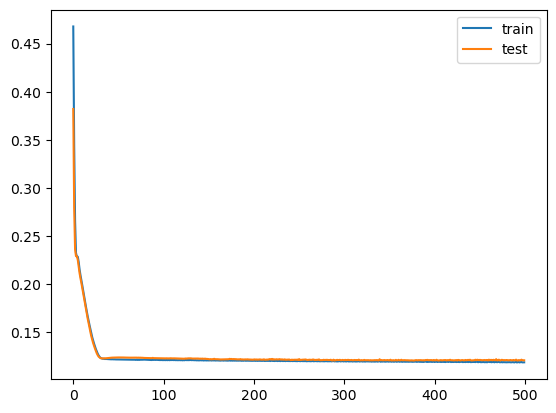

In [82]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [83]:
final_predictions = model.predict(test_X)
print(final_predictions.shape)

4/4 [==============================] - 0s 4ms/step
(99, 1)


In [84]:
train_predictions = model.predict(train_X)
print(train_predictions.shape)

13/13 [==============================] - 0s 2ms/step
(392, 1)


In [85]:
pd.DataFrame(train_y).to_csv('actualTrainGRU .csv', index=False, header=False)
pd.DataFrame(train_predictions).to_csv('predictTrainGRU.csv', index=False, header=False)
pd.DataFrame(test_y).to_csv('actualTestGRU.csv', index=False, header=False)
pd.DataFrame(final_predictions).to_csv('predictTestGRU.csv', index=False, header=False)

In [86]:
evaluation_metrics = calculate_evaluation_metrics(test_y, final_predictions)
print(evaluation_metrics)

{'ME': 0.0006170173, 'MAE': 0.12067674, 'MSE': 0.025441721, 'RMSE': 0.1595046, 'NRMSE': 0.1662776, 'PBIAS': 0.12142286, 'RSR': 0.5513745, 'rSD': 1.3448052, 'NSE': -178.04205322265625, 'mNSE': -178.04205322265625, 'rNSE': -2127.4994982707235, 'd': 0.4289736747741699, 'md': 0.4289736747741699, 'rd': 0.4289736747741699, 'cp': 0.4289736747741699, 'r': 0.4289736747741699, 'R2': 0.6959861683485136}
